# Examen Recuperativo



## Instrucciones

El examen recuperativo cuenta de 2 partes:
- **Problem Set**: Problema de código, el cual deben resolver en 90 minutos.
- **Presentación**: Sesión de 15-20 minutos donde deberán explicar su desarrollo (5 min) y responder 5 preguntas de forma individual (10-15 minutos).

**Importante**: No es necesario que preparen diapositivas para la presentación. Nos basta con que nos muestren su código.

## Formato de Entrega

Una vez que hayan terminado el Problem Set, deben subir todo su desarrollo a U-cursos. La carpeta entregada debe seguir la siguiente estructura:

```python
Proyecto
├── Entrenamiento # código de sección Entrenamiento
├── Despliegue # código de sección Despliegue
└── Airflow # código de sección Airflow
```

# Problem Set

El alcalde de su ciudad está preocupado porque observa que cada vez hay más accidentes automovilísticos. Aunque ya cuenta con un equipo de analistas trabajando en el proyecto, no confía en la calidad de su desarrollo, por lo que les pide finalizar el trabajo.

<center>
<img src='https://media.tenor.com/images/962c01e3feae246c8691cbce6646a218/tenor.gif' width=350  />
</center>

## Entrenamiento

A continuación, se le entrega el código desarrollado por el equipo anterior.

**Este código contiene errores.**

Se le solicita:
- Arreglar el código entregado.
- Entrenar el modelo.
- Exportar el modelo usando `Pickle`.

### Entregables

- Notebook con la solución a los problemas.

### Presentación

En la presentación, usted tendrá que:
- Explicar y justificar los errores encontrados.
- Explicar y justificar la solución para cada error.

**Nota:**
- Enfóquense sólo en corregir el código entregado.
- Pueden eliminar pasos o líneas de código si lo desean.
- La solución a los errores es directa. No deberían pasar más de 10 minutos en esta sección.
- No es necesario que justifiquen su procedimiento en el informe, pero deben explicar su lógica en la presentación.
- La versión actual de scikit-learn contiene errores. Utilicen versiones anteriores para evitar cualquier problema.

In [ ]:
import pandas as pd

df = pd.read_csv("accidents.csv") # leer data
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,Rainy,Rural Road,Afternoon,0.0,60.0,4.0,0.0,Moderate,Dry,Car,53.0,45.0,Daylight,0.0
794,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
795,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
796,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [ ]:
# check de valores nulos
df.isnull().sum().sort_values(ascending = False)

,0
Weather,40
Driver_Alcohol,40
Driver_Age,40
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Accident_Severity,0
Road_Condition,0


In [ ]:
def preprocess(df):

    """
    Prepara el dataframe para luego ser entrenado. En particular:
    - Imputa valores nulos
    - Genera features para aumentar la explicabilidad del modelo
    """

    df_proc = df.copy()

    # Imputar
    ## Weather
    weather_mode = df_proc["Weather"].mode().iloc[0]
    df_proc["Weather"] = df_proc["Weather"].fillna(weather_mode)

    ## Driver_Alcohol
    df_proc["Driver_Alcohol"] = df_proc["Driver_Alcohol"].fillna(0)

    ## Driver_Age
    age_mean = df_proc["Driver_Age"].mean()
    df_proc["Driver_Age"] = df_proc["Driver_Age"].fillna(age_mean)

    # Feature Engineering
    df_proc["Speed_Accident"] = df_proc["Speed_Limit"] * df_proc["Accident"]
    df_proc["Traffic_Norm"] = df_proc["Traffic_Density"] - df_proc["Traffic_Density"].mean()

    return df_proc

df_proc = preprocess(df)

In [ ]:
from sklearn.model_selection import train_test_split

target = "Accident"

X = df_proc.drop(columns = [target])
y = df_proc[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y)
X_train

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Speed_Accident,Alcohol_Experience,Traffic_Norm
584,Rainy,City Road,Afternoon,1.0,30.0,3.0,0.0,Low,Dry,Car,43.490765,54.0,No Light,0.0,0.0,-0.011278
749,Rainy,City Road,Morning,1.0,120.0,3.0,1.0,Low,Icy,Car,54.000000,49.0,No Light,120.0,49.0,-0.011278
554,Rainy,Mountain Road,Morning,2.0,50.0,1.0,0.0,Moderate,Dry,Motorcycle,61.000000,54.0,Artificial Light,0.0,0.0,0.988722
512,Foggy,Highway,Night,0.0,60.0,5.0,0.0,Low,Dry,Car,69.000000,41.0,Daylight,0.0,0.0,-1.011278
592,Clear,Highway,Evening,1.0,50.0,2.0,0.0,Low,Under Construction,Truck,61.000000,52.0,Daylight,50.0,0.0,-0.011278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Clear,Highway,Afternoon,2.0,60.0,5.0,0.0,Low,Dry,Truck,34.000000,25.0,Artificial Light,60.0,0.0,0.988722
528,Rainy,City Road,Night,0.0,30.0,1.0,1.0,Moderate,Dry,Motorcycle,43.490765,63.0,Artificial Light,30.0,63.0,-1.011278
312,Snowy,City Road,Morning,1.0,100.0,1.0,1.0,Low,Icy,Car,36.000000,34.0,Daylight,0.0,34.0,-0.011278
212,Stormy,Rural Road,Evening,1.0,80.0,2.0,0.0,Low,Icy,Car,21.000000,14.0,Artificial Light,80.0,0.0,-0.011278


In [ ]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
import numpy as np

categorical_variables = X_train.select_dtypes(include=["object", "category"]).columns

categorical_pipeline = Pipeline([
    ("OneHot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

numeric_variables = X_train.select_dtypes(include=np.number).columns

numeric_pipeline = Pipeline([
    ("Scaler", RobustScaler())
])

ct = ColumnTransformer([
    ("categorical_pipeline", categorical_pipeline, categorical_variables),
    ("numeric_pipeline", numeric_pipeline, numeric_variables)
])

pipeline = Pipeline([
    ("column_transformer", ct),
    ("model", XGBClassifier())
])

pipeline

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(ste...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
from sklearn.metrics import classification_report

# Fit
pipeline.fit(X_train, y_train)

# Medir performance
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       112
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [ ]:
# código para exportar modelo
...

## Despliegue

<center>
<img src='https://media1.tenor.com/m/Mfamt2u-Mb0AAAAd/il-paradiso-delle-signore-vittorio-conti.gif' width=350  />
</center>

En esta sección deben desplegar el modelo entrenado para ser utilizado en producción.

Se le pide:
- Genere código para levantar una API que contenga el modelo entrenado.
- La API debe disponer el endpoint `/predict` el cual debe retornar las predicciones hechas por el modelo.
    - Este endpoint solo debe recibir la variable `Driver_Age`, asuma que el resto de las variables toma un valor constante (a su elección).
- Genere el código y archivos necesarios para llevar la API a `Docker`.

### Entregables

- Todos los archivos necesarios para levantar la API usando `Docker`.

### Presentación

En la presentación, usted tendrá que:
- Explicar brevemente su código y archivos generados
- Levantar la API usando `Docker`
- Generar predicciones usando la API

**Nota:** No es necesario generar frontend.

## Airflow

<center>
<img src='https://i.redd.it/2231e36jh5bb1.jpg' width=300>

Dado el excelente desarrollo de los puntos anteriores, el equipo de *ML Engineers* le solicita que diseñe un pipeline productivo utilizando Airflow para llevar su modelo a producción. El objetivo es generar un DAG que permita realizar inferencias sobre nuevos datos a partir de dos conjuntos: un conjunto de datos "sucios" y otro "limpio".

En el conjunto de datos "sucios", se presentan las siguientes condiciones que deben considerarse:
- Algunos nombres de columnas han sido modificados.
- Los valores de velocidad máxima están en millas por hora (mph).
- Existen valores nulos que no son relevantes para el análisis.

Basándose en lo mencionado y en lo desarrollado en las secciones anteriores, implemente una **pipeline productiva y sencilla** que cumpla con los siguientes requisitos:

1. **Descarga de datasets**: Descargue los siguientes archivos desde las URLs proporcionadas:
   - [Dataset limpio](https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/exam/data_limpia.csv)
   - [Dataset sucio](https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/exam/data_sucia.csv)

2. **Limpieza del dataset sucio**: Realice exclusivamente la limpieza del dataset sucio, considerando las siguientes transformaciones:
   - Elimine todas las filas que contengan datos nulos.
   - Transforme la variable `Max_Speed` de millas por hora (mph) a kilómetros por hora (km/h) dividiendo la variable por `0.621371`.
   - Renombre las siguientes columnas:
     - `"Max_Speed"` -> `"Speed_Limit"`
     - `"Vehicle_Count"` -> `"Number_of_Vehicles"`
     - `"Alcohol_Level"` -> `"Driver_Alcohol"`

3. **Unión de datasets**: Combine los dos datasets (limpio y sucio). Esta tarea deberá ejecutarse independientemente de que se hayan completado las descargas de ambos datasets. Por lo tanto, deberá configurar adecuadamente el **`trigger_rule`** para garantizar que esta tarea no dependa del éxito de las descargas.

4. **Generación de predicciones**: Cargue el modelo proporcionado en el archivo del enunciado, genere predicciones utilizando el dataset combinado y almacene los resultados en una ubicación designada dentro del contenedor Docker donde se ejecuta la pipeline.

### Consideraciones para el desarrollo:

- **Periodicidad del DAG**:
  - Configure el pipeline para que comience **hace 2 días** y procese los datos de forma **diaria**, asegurando la ejecución de tareas pendientes mediante **backfilling**.
- **Funciones auxiliares**:
  - Genere todas las funciones necesarias (por ejemplo, para limpieza, descarga y predicción) en un archivo auxiliar de Python.
- **Archivos entregados**:
  - Apóyese en los archivos proporcionados junto con el examen para implementar las tareas requeridas.

### Entregables:

1. **Código del DAG**:
   - Proporcione el código completo de su pipeline implementado en Airflow, incluyendo las tareas y dependencias necesarias.
2. **Evidencia de ejecución**:
   - Capture un **screenshot** mostrando el DAG en la interfaz de Airflow.
   - Capture también la ejecución exitosa de todas las tareas incluidas en el DAG.

**Importante**: Para el desarrollo, utilice el siguiente archivo de referencia: [airflow.zip](https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/blob/main/exam/enunciado.zip). En él encontrará una guía detallada del problema, que le servirá de apoyo para completar el desarrollo de manera más sencilla y estructurada.

### Presentación

Para la presentación, su equipo tendrá que:
- Mostrar y explicar el código desarrollado.
- Mostrar el funcionamiento del pipeline en vivo.


### **DAG esperado de referencia:**

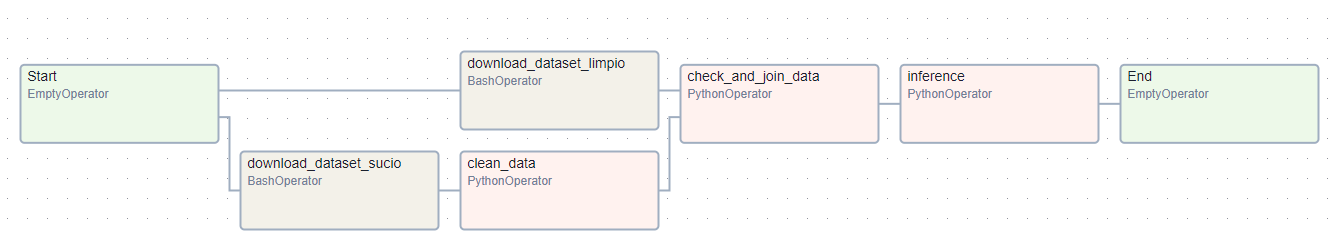